# 1

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [125]:
N = int(1e3)
prime = [2]
for i in range(3, N, 2):
  is_prime = True
  for j in range(3, int(np.sqrt(i)) + 1):
    if i % j == 0:
      is_prime = False
      break
  if is_prime:
    prime.append(i)

X = []
y = []
for i in range(2, N):
  v = []
  for p in prime:
    c = 0
    m = i
    while m % p == 0:
      m = m // p
      c += 1
    v.append(c)
  X.append(v)
  y.append('chet' if i % 2 == 0 else 'nechet')

# TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


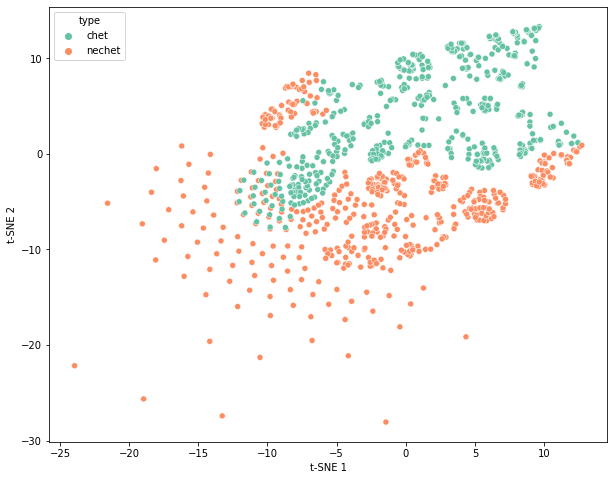

In [126]:
model = TSNE(n_components = 2, perplexity = 50)
X1 = model.fit_transform(X)

df = pd.DataFrame()
df['t-SNE 1'] = X1[:, 0]
df['t-SNE 2'] = X1[:, 1]
df['type'] = y

fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.scatterplot(
    x = 't-SNE 1', y = 't-SNE 2', 
    hue = 'type', data = df, palette = "Set2"
)

# PCA

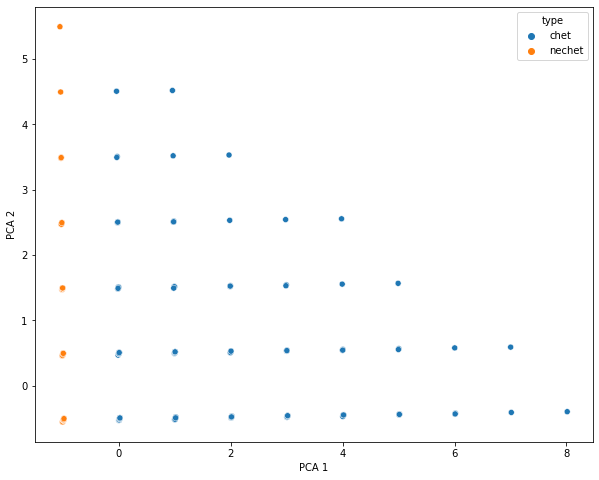

In [119]:
model = PCA(n_components = 2)
model.fit(X)
X2 = model.transform(X)

df = pd.DataFrame()
df['PCA 1'] = X2[:, 0]
df['PCA 2'] = X2[:, 1]
df['type'] = y

fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.scatterplot(
    x = 'PCA 1', y = 'PCA 2', 
    hue = 'type', data = df, palette = 'Set2'
)

# 2

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [105]:
df = pd.read_csv('human_coronavirus_aln_scores.tsv', sep = '\t', index_col = 0)
df.head()

,NC_006577.2,MK167038.1,MH940245.1,KT779555.1,KT779556.1,KF686340.1,KF686341.1,KF686342.1,KF686343.1,KF686344.1,...,KF514391.1,KF514392.1,KF514393.1,KF514394.1,KF514395.1,KF514396.1,KF514397.1,KF514398.1,KF514399.1,KF514400.1
NC_006577.2,5000.0,4480.0,4462.0,4946.0,4946.0,4645.0,4648.0,4648.0,4654.0,4789.0,...,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0
MK167038.1,4480.0,5000.0,4964.0,4480.0,4480.0,4458.0,4461.0,4461.0,4467.0,4323.0,...,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5
MH940245.1,4462.0,4964.0,5000.0,4462.0,4462.0,4440.0,4443.0,4443.0,4449.0,4305.0,...,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5
KT779555.1,4946.0,4480.0,4462.0,5000.0,5000.0,4609.0,4612.0,4612.0,4618.0,4843.0,...,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0
KT779556.1,4946.0,4480.0,4462.0,5000.0,5000.0,4609.0,4612.0,4612.0,4618.0,4843.0,...,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0


Применим следующую метрику:

$$d_{ij} = 1 - \frac{x_{ij}}{5000}$$

Где $d_{ij}$ - расстояние между $i$-ым и $j$-ым геномом, а $x_{ij}$  - мера схожести $i$-го и $j$-го генома, которая нам дана в исходном датасете.

$$\forall i,j \in [0 \ldots len(df) - 1]: 0 \leq d_{ij} \leq 1$$


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


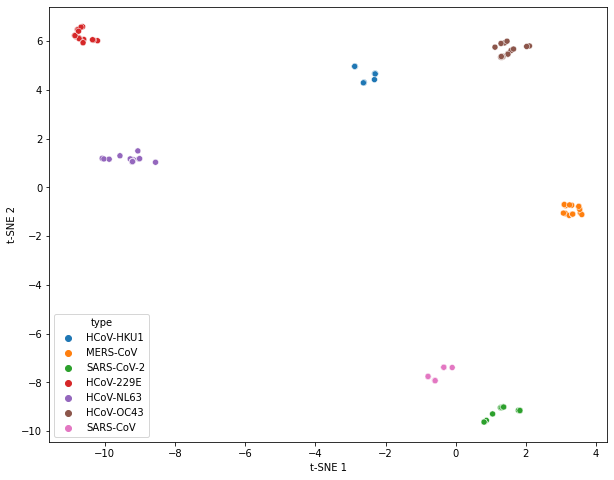

In [100]:
df = pd.read_csv('human_coronavirus_aln_scores.tsv', sep = '\t', index_col = 0)
X = 1 - df/5000

name = ['HCoV-HKU1', 'MERS-CoV', 'SARS-CoV-2', 'HCoV-229E', 
        'HCoV-NL63', 'HCoV-OC43', 'SARS-CoV']
y = []
for i in name:
  for j in range(20):
    y.append(i)

model = TSNE(n_components = 2, perplexity = 30, metric = 'precomputed')
X = model.fit_transform(X)

df['t-SNE 1'] = X[:, 0]
df['t-SNE 2'] = X[:, 1]
df['type'] = y

fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.scatterplot(x = 't-SNE 1', y = 't-SNE 2', hue = 'type', data = df)

# 3

In [73]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD as SVD

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
cancer = pd.read_csv('csv-cancer-set.csv', index_col = 0)
virus = pd.read_csv('csv-virus-set.csv', index_col = 0)
title = cancer[:1000]['Title'].to_list() + virus[:1000]['Title'].to_list()
y = ['cancer']*1000 + ['virus']*1000

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


# TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


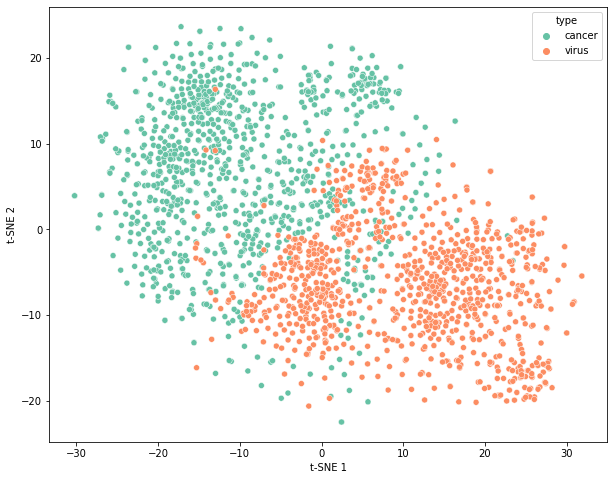

In [70]:
to_vect = CountVectorizer()
X = to_vect.fit_transform(title)

model = TSNE(n_components = 2, perplexity = 30)
X = model.fit_transform(X)

df = pd.DataFrame()
df['t-SNE 1'] = X[:, 0]
df['t-SNE 2'] = X[:, 1]
df['type'] = y

fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.scatterplot(
    x = 't-SNE 1', y = 't-SNE 2', hue = 'type', 
    data = df, palette = "Set2"
)

# PCA
PCA не работает из за слишком разреженной матрицы(**sparse matrices**). "Notice that this PCA does not work with sparse input. See TruncatedSVD for an alternative with sparse data"

PCA documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Пришлось использовать **TruncatedSVD**. 
"...Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently."

TruncatedSVD documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

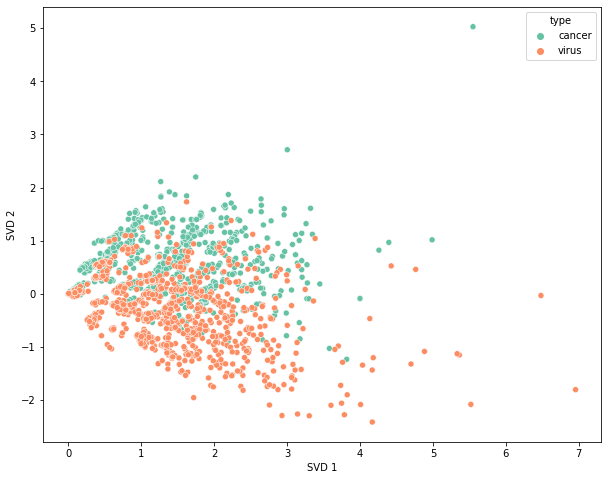

In [74]:
to_vect = CountVectorizer()
X = to_vect.fit_transform(title)

model = SVD(n_components = 2)
X = model.fit_transform(X)

df = pd.DataFrame()
df['SVD 1'] = X[:, 0]
df['SVD 2'] = X[:, 1]
df['type'] = y

fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.scatterplot(
    x = 'SVD 1', y = 'SVD 2', hue = 'type', 
    data = df, palette = "Set2"
)

# 4 и 5

https://habr.com/ru/post/491448/

Token Sort Ratio

Слова сравниваются друг с другом, независимо от регистра или порядка

Идеальное совпадение двух строк = $100$, идеальное несовпадение = $0$

In [86]:
!pip install fuzzywuzzy

In [87]:
from fuzzywuzzy import fuzz

In [91]:
X = []
for i in title:
  v = []
  for j in title:
    v.append(100 - fuzz.token_sort_ratio(i, j))
  X.append(v)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


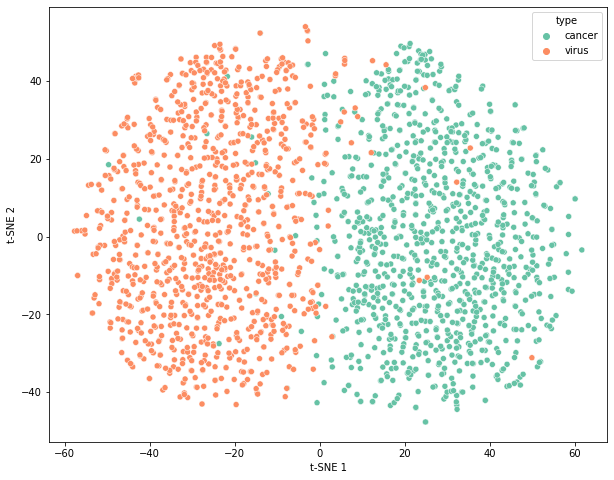

In [92]:
model = TSNE(n_components = 2, perplexity = 30, metric = 'precomputed')
X = model.fit_transform(X)

df = pd.DataFrame()
df['t-SNE 1'] = X[:, 0]
df['t-SNE 2'] = X[:, 1]
df['type'] = y

fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.scatterplot(
    x = 't-SNE 1', y = 't-SNE 2', hue = 'type', 
    data = df, palette = "Set2"
)